<a href="https://colab.research.google.com/github/hitsaikateie/Capstone-project-Regression/blob/main/Yes_Bank_Stock_closing_price_prediction_ML_Submission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - **Yes Bank Stock closing price prediction**


##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Team Member 1 -** Saikat Halder
##### **Team Member 2 -**
##### **Team Member 3 -**
##### **Team Member 4 -**

# **Project Summary -**

Yes Bank is an wellknown bank in idia which provides wide range of services and solutions right from bank accounts, deposits, cards, cash management, privilege banking, trade finance, Non-Resident India (NRI) banking, institutional banking, merchant acquiring, digital banking and agricultural banking solutions. As the data is all about the stock price.So, In this project I will be analyzing the patterns of the dataset by performing exploratory data analysis and try to build a model with the help of machine learning for predicting the closing stock price.

The tools for data analysis and model building used in this project are the packages from Python library such as Numpy and Pandas, Matplotlib , Seaborn, Linear Regression, lasso,ridge, ElasticNet,Minmaxscaler etc.



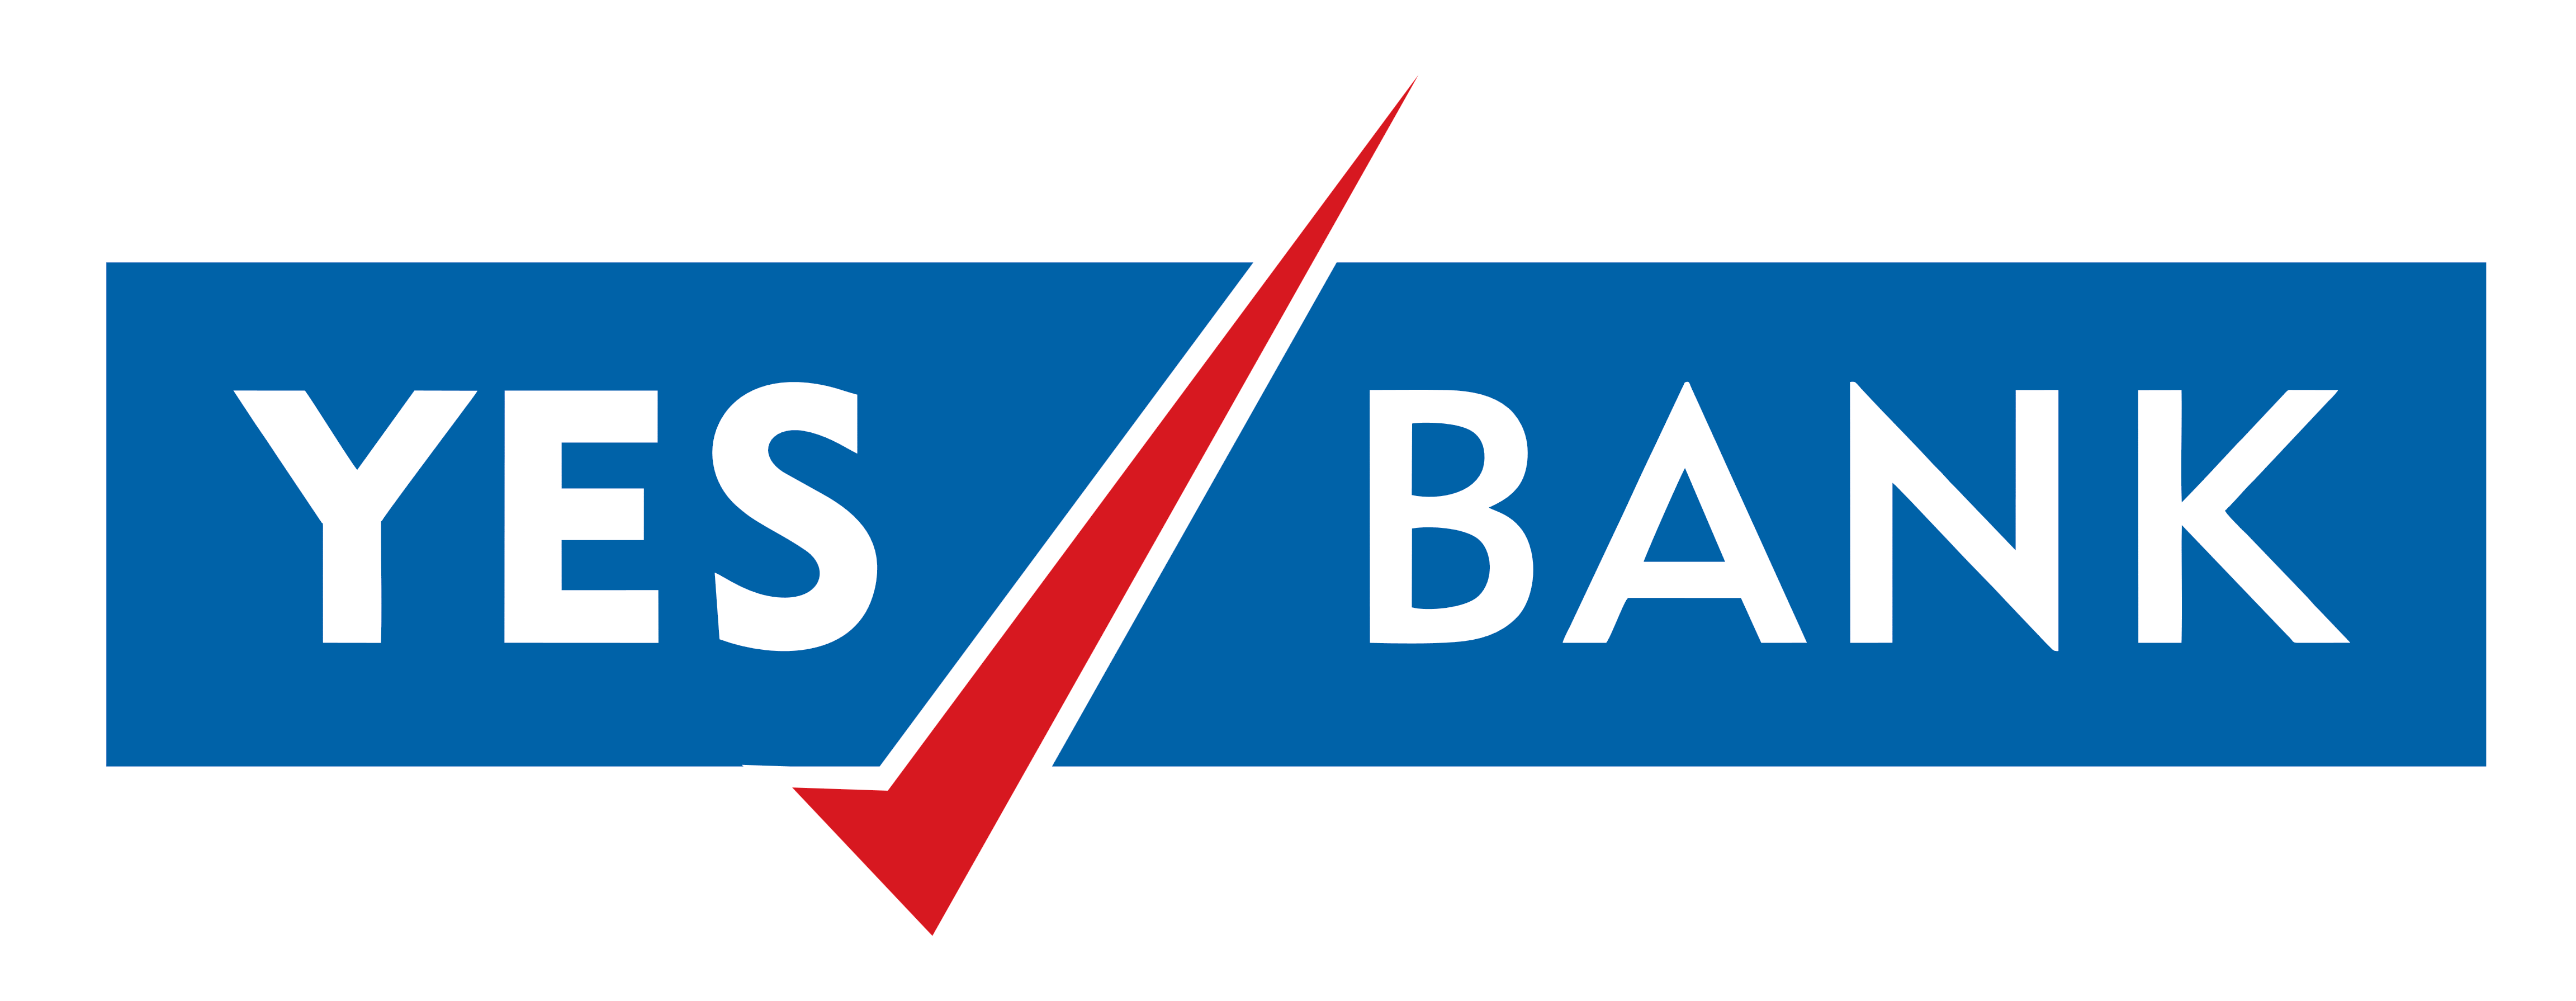

# **GitHub Link -**

https://github.com/hitsaikateie/Capstone-project-Regression/tree/main

# **Problem Statement**


The given data set contains stock price information in the various columns by monthly date. There are 5 columns in the data set such as date, open, high, low, closing price. our target variable here is the closing price column which we will try to predict for future. So first we will perform some exploratory data analysis to tha data, try to find out some patterns as well as see the relations between the various columns and the target variable column. Then we will be building a model through which we will be able to predict or provide a decent estimate of the closing price which is our target variable.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
from numpy import math
from datetime import datetime

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import (Lasso, Ridge, ElasticNet)
from sklearn.metrics import r2_score
from sklearn.metrics import (mean_squared_error, mean_absolute_percentage_error, mean_absolute_error)
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [ ]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive/')

### Dataset First View

In [ ]:
# Dataset First Look
path=('/content/data_YesBank_StockPrices.csv')
YB_df=pd.read_csv(path)

In [ ]:
YB_df.sample(5)

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
YB_df.shape

In [ ]:
number_of_rows=YB_df.shape[0]

In [ ]:
number_of_rows

In [ ]:
number_of_columns=YB_df.shape[1]

In [ ]:
number_of_columns

### Dataset Information

In [ ]:
# Dataset Info
YB_df.info()

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
YB_df.duplicated().sum()

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
YB_df.isnull().sum().sum()

In [ ]:
# Visualizing the missing values

**There are no missing values in the data set**

### What did you know about your dataset?

Out dataset contains 185 rows and 5 columns with diffrent varriable types. There are no missing values as well as duplicate values in the dataset. There are 2 type of information inside the columns as float and object. Basically the given dataset is providing us the overview of the stock price details information and by generating the insight from those we will try to see the relations between our target variable(Closing price) and the independent variables that are the other 4 columns. Then we will be building a model through which we will be able to predict or provide the estimates of the closing price.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
YB_df.columns

In [ ]:
# Dataset Describe
YB_df.describe()

### Variables Description

The name of the individual varriables mentioned in the columns of the data set and the descriptions of them are listed below:

⦁ Date: Month and day information on which the information was recorded.(Categorical)

⦁ Open : Opening stock price.(Numeric)

⦁ High : Highest Stock price.(Numeric)

⦁ Low : Lowest Stock Price.(Numeric)

⦁ Close : Closing Stock Price.(Numeric)


### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for items in YB_df.columns.tolist():
  print('The number of uniques values in column',items,'is', YB_df[items].nunique())

In [ ]:
YB_df['Date'].unique()

In [ ]:
YB_df['High'].unique()

In [ ]:
YB_df['Open'].unique()

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
YB_df['Date']= pd.to_datetime(YB_df['Date'].apply(lambda x:datetime.strptime(x, '%b-%y')))

In [ ]:
YB_df.head()

### What all manipulations have you done and insights you found?

The given data set does not have any missing values or null values. Also there are no duplicate values in the data set as I have checked already. Since the 'Date' column was not arranged in a proper format, I have changed the 'Date' column in to the format Year-month-date that will be hepfull to visualize the data.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

#### **Univariate Analysis**

In [ ]:
# Chart - 1 visualization code
# Dependent variable 'Price'
plt.figure(figsize=(15,10))
sns.distplot(YB_df['Close'],color="y")

##### 1. Why did you pick the specific chart?

To see the distribution of Closing price in the dataset I have used the dist plot as with the help of dist plot I will be able to check the skewness of the data and according to that data will be transformed to handle the skewness.

##### 2. What is/are the insight(s) found from the chart?

The above chart shows that the 'Close' columnm data is possitively skewed. So I have to transform this column data to log scale data for handling the skewness.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes the gain insight shows the posstive skewed distribution of the 'Close' column that will help me to understand and the methods to be applied to tackle the skewness of the data.

#### Chart - 2

In [ ]:
numeric_features = YB_df.describe().columns

In [ ]:
numeric_features

In [ ]:
# Chart - 2 visualization code

In [ ]:
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = YB_df[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='Red', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='magenta', linestyle='dashed', linewidth=2)
    ax.set_title(col)
plt.show()

##### 1. Why did you pick the specific chart?

As histogram is a very popular tool so the chart will show the overview of each and every varriables information and gives a clear idea about the data set. It also sumarizes the measured data.

##### 2. What is/are the insight(s) found from the chart?

From the above charts it can be clearly seen that all the numeric variables are possitively skewed. So I have to transform these column datas to log scale data for handling the skewness.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes the gain insight shows the posstive skewed distribution of all the numeric columns that will help me to understand and the methods to be applied to tackle the skewness of the data.

#### Chart - 3

In [ ]:
# Chart - 3 visualization code
fig = plt.figure(figsize=(10, 6))
ax = fig.gca()
feature = YB_df['Date']
feature.hist(bins=50, ax = ax)
ax.axvline(feature.mean(), color='Red', linestyle='dashed', linewidth=2)
ax.axvline(feature.median(), color='magenta', linestyle='dashed', linewidth=2)
plt.show()

##### 1. Why did you pick the specific chart?

To see the distribution of 'Date' column which is a categorical in the dataset I have used the dist plot .

##### 2. What is/are the insight(s) found from the chart?

As the Date column is categorical information and from the distogram plot it is clear that the date column is equally distributed.

#### Chart - 4

**Bivariate Analysis**

In [ ]:
# Chart - 4 visualization code
ax=px.line(YB_df,YB_df['Date'],YB_df['Close'],title='Monthly Closing Price')
ax.update_layout(xaxis=dict(title='year'),yaxis=dict(title='Closing Price'))
ax.show()

##### 1. Why did you pick the specific chart?

As I am doing bivariate analysis. Therefor the above line plot shows the relationship between the 'Date' column and the closing price.

##### 2. What is/are the insight(s) found from the chart?

From the above chart it can be seen that there was consistant overall growth in the stock price till 2014 afcourse with some downfalls. But after 2014 the stock price started raise high and from 2016 through 2018 the growth was very impressive some times the stock price raised to over 350. But in the year of 2020 there was heavy downfall in the stock prices. The reason must be the fraud case for which one of the founder of the bank was arrested which is known to all.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes the gained insight is showing the overall trends of the stock price throughout the year. By just seeing the trend we can have an idea as when to invest for buying yes bank shares.

#### Chart - 5

In [ ]:
# Chart - 5 visualization code
fig = plt.figure(figsize=(9, 6))
ax = fig.gca()
feature = YB_df['Open']
label = YB_df['Close']
correlation = feature.corr(label)
plt.scatter(x=feature, y=label)
plt.xlabel('Open')
plt.ylabel('Close')
ax.set_title('Close vs ' + 'Open' + '- correlation: ' + str(correlation))
z = np.polyfit(YB_df['Open'], YB_df['Close'], 1)
y_hat = np.poly1d(z)(YB_df['Open'])

plt.plot(YB_df['Open'], y_hat, "r--", lw=1)

plt.show()

##### 1. Why did you pick the specific chart?

The above scatter plot shows the relation between the Open and Close.

##### 2. What is/are the insight(s) found from the chart?

As we can see that the Open and Close data are Highly correlated therefore we can say that the closing price is very much dependant upon the Opening price of the stock

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. The high correlation between the Open and Price indicates that Opening price will alway plays an important role to have an idea about closing price.

#### Chart - 6

In [ ]:
# Chart - 6 visualization code
fig = plt.figure(figsize=(9, 6))
ax = fig.gca()
feature = YB_df['High']
label = YB_df['Close']
correlation = feature.corr(label)
plt.scatter(x=feature, y=label)
plt.xlabel('High')
plt.ylabel('Close')
ax.set_title('Close vs ' + 'High' + '- correlation: ' + str(correlation))
z = np.polyfit(YB_df['High'], YB_df['Close'], 1)
y_hat = np.poly1d(z)(YB_df['High'])

plt.plot(YB_df['High'], y_hat, "r--", lw=1)

plt.show()

##### 1. Why did you pick the specific chart?

The above scatter plot shows the relation between the High and Close.

##### 2. What is/are the insight(s) found from the chart?

As we can see that the High and Close data are Highly correlated therefore we can say that the closing price is also very much dependant on the High price of the stock.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. The high correlation between the High and Price indicates that High price will always play an important role to have an idea about closing price.

#### Chart - 7

In [ ]:
# Chart - 7 visualization code
fig = plt.figure(figsize=(9, 6))
ax = fig.gca()
feature = YB_df['Low']
label = YB_df['Close']
correlation = feature.corr(label)
plt.scatter(x=feature, y=label)
plt.xlabel('Low')
plt.ylabel('Close')
ax.set_title('Close vs ' + 'Low' + '- correlation: ' + str(correlation))
z = np.polyfit(YB_df['Low'], YB_df['Close'], 1)
y_hat = np.poly1d(z)(YB_df['Low'])

plt.plot(YB_df['Low'], y_hat, "r--", lw=1)

plt.show()

##### 1. Why did you pick the specific chart?

The above scatter plot shows the relation between the Low and Close.

##### 2. What is/are the insight(s) found from the chart?

Also we can see that the Low and Close data are also Highly correlated therefore we can say that the closing price is also very much dependant on the Low price of the stock.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. The high correlation between the Low and Price indicates that Low price will also play an important role to have an idea about closing price.

#### Chart - 8 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code
plt.figure(figsize=(7,3))
sns.heatmap(YB_df.corr(),annot=True,cmap='coolwarm')

##### 1. Why did you pick the specific chart?

Correlation heatmaps are a type of plot that visualize the strength of relationships between numerical variables. Correlation plots are used to understand which variables are related to each other and the strength of this relationship. A correlation plot typically contains a number of numerical variables, with each variable represented by a column. The rows represent the relationship between each pair of variables. The values in the cells indicate the strength of the relationship, with positive values indicating a positive relationship and negative values indicating a negative relationship.

Therefore, to show the relations between the varriables we have used this plot.

##### 2. What is/are the insight(s) found from the chart?

From the above chart we can se that each and every feature here is highly correlated to each other. As the linear Regression assumes that there is no multicolinearity therefore we will try to reduce the multicolinearity using transformation of variables.

#### Chart - 9 - Pair Plot

In [ ]:
# Pair Plot visualization code
sns.pairplot(YB_df,hue="Close")

##### 1. Why did you pick the specific chart?

Pair plot is used to understand the best set of features to explain a relationship between two variables or to form the most separated clusters.The Pairplot visualizes given data to find the relationship between them where the variables can be continuous or categorical.

##### 2. What is/are the insight(s) found from the chart?

As I have used Close in the hue variable so the above plot will show the distribution of Close with the different type of columns.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

Threr are no missing values and null values in the dataset

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments
fig=px.box(YB_df['Open'])
fig.update_layout(xaxis=dict(title='Boxplot'))
fig.show()

In [ ]:
fig=px.box(np.log10(YB_df['Open']),title='applied log10')
fig.update_layout(xaxis=dict(title='Boxplot'))
fig.show()

In [ ]:
fig=px.box(YB_df['High'])
fig.update_layout(xaxis=dict(title='Boxplot'))
fig.show()

In [ ]:
fig=px.box(np.log10(YB_df['High']),title='applied log10')
fig.update_layout(xaxis=dict(title='Boxplot'))
fig.show()

In [ ]:
fig=px.box(YB_df['Low'])
fig.update_layout(xaxis=dict(title='Boxplot'))
fig.show()

In [ ]:
fig=px.box(np.log10(YB_df['High']),title='applied log10')
fig.update_layout(xaxis=dict(title='Boxplot'))
fig.show()

In [ ]:
# Dependent variable 'Price'
plt.figure(figsize=(15,10))
sns.distplot(np.log10(YB_df['Close']),color="y")

In [ ]:
YB_df.set_index('Date' , inplace=True)

In [ ]:
YB_df.head(10)

In [ ]:
dependant_variable='Close'

In [ ]:
Independant_variable=list(set(YB_df.columns.tolist())-{dependant_variable})

In [ ]:
x= np.log10(YB_df[Independant_variable]).values

In [ ]:
y=np.log10(YB_df[dependant_variable]).values

##### What all outlier treatment techniques have you used and why did you use those techniques?

There were 3 independent features that had outliers shown in the above box plot. So to handle the outliers as well as to tackle the skewness of the datas I have transformed all the numeric features to log base 10 values.

After the conversion of numeric features I also have visualized them through the box plot that shows no outliers also the price column information can be see as an approx normal distribution.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***